# Introduction

These are my notes on statistics and quantitative methods for analysis in the social sciences.

## Why use statistics?

As social scientists and researchers we want to answer questions about the social world.
At its most simplistic (and I completely acknowledge that I'm massively generalising here), we usually seek to describe the world or quantify the world.
For these tasks we use qualitative methods and quantitative methods respectively.

To quantify the world we might want to know things like, "how many people have been a victim of crime?", "how many people have mental health problems?", or "how many people have social science degrees?".

Sometimes we have complete (or near--complete) data about everybody in a population.
For example, in the UK the decennial (i.e. every ten years) census is a count of everybody, including certain characteristics such as health, education, and employment.
In this case the population is everybody in the UK.

More often than not it is impractical to ask everybody our questions.
Usually the cost and time required to carry out such a survey prohibit asking every single person what we want to know, but also very few people would answer everything that they were asked (the only reason everybody responds to the census is because [it's a crime not to complete the census](https://en.wikipedia.org/wiki/Census_in_the_United_Kingdom#Criminal_law) and [people have been prosecuted for not completing it](https://www.theguardian.com/uk/2012/jan/27/120-convicted-census-forms-2011)).
Instead we take a *sample* of the population, and *infer*, from our sample, what the population is like.

For example, we might ask a random sample of 1,000 people what their favourite hot drink is.
It's not that we want to know what this 1,000 people think more than any other 1,000 people.
Instead, they are our *sample* and, based on their responses, we can *infer* what the most popular hot drink is for the *population*.
In the UK, the [most popular hot drink is tea](https://www.statista.com/statistics/697383/favorite-hot-drinks-united-kingdom-uk/), but everybody knows it should be coffee.

![Coffee is clearly superior to tea](../images/coffee.jpg)

Obtaining knowledge about a *population* by *inferring* from a *sample* is the cornerstone of quantitative social science research, and uses many statistical techniques to be able to do this.
The good news is the most difficult challenge is often deciding which technique to use; using the technique is often like following a recipe.


## Packages

I use `python3` to process and analyse the data, and a number of packages install through anaconda.


In [19]:
import os
import requests
import shutil
import pandas as pd
import matplotlib.pyplot as plt

## Data sources

These tutorials use a number of teaching data sets available from the [UK Data Service](https://www.ukdataservice.ac.uk/) under terms of the [Open Government License](http://www.nationalarchives.gov.uk/doc/open-government-licence/version/3/):

> Office for National Statistics, University of Manchester, Cathie Marsh Institute for Social Research (CMIST), UK Data Service, 2016, Living Costs and Food Survey, 2013: Unrestricted Access Teaching Dataset, [data collection], Office for National Statistics, 2nd Edition, Office for National Statistics, [original data producer(s)]. Accessed 1 October 2018. SN: 7932, http://doi.org/10.5255/UKDA-SN-7932-2. Contains public sector information licensed under the Open Government Licence v2.0


In [8]:
os.makedirs("../data/external", exist_ok=True)

if not os.path.isfile("../data/external.food.zip"):
    food = "https://beta.ukdataservice.ac.uk/Umbraco/Surface/Discover/GetDownload?studyNumber=7932&fileName=7932tab_818dcb297393b2557b07f05acaae70b9.zip"
    food = requests.get(food)
    food = food.content
    outfile = open("../data/external/food.zip", "wb")
    outfile.write(food)

if not os.path.isdir("../data/external/UKDA-7932-tab/"):
    shutil.unpack_archive("../data/external/food.zip", extract_dir = "../data/external/")

In [3]:
food = pd.read_csv(
    "../data/external/UKDA-7932-tab/tab/lcfs_2013_teaching.tab",
    sep = "\t"
)

# Check it's loaded correctly
food.head()

,casenew,weighta,P550tpr,P344pr,P425r,A172,A093r,A094r,A121r,SexHRP,A049r,G018r,G019r,Gorx,weightar
0,14999,2.834724,380.695762,465.36,1,1,4,3,1,2,4,2,3,4,0.543248
1,14993,10.077947,546.413403,855.26,1,1,1,4,3,2,2,2,1,7,1.931344
2,14993,4.088676,242.189023,160.96,1,1,1,2,3,2,1,1,1,8,0.783557
3,14984,4.571760,421.382353,656.22,1,1,1,3,3,1,2,2,1,6,0.876135
4,14981,7.349617,370.405577,398.80,1,1,1,4,3,1,1,1,1,8,1.408485


# Levels of measurement

Levels of measurement describe the nature of your data point.
They are important because they determine what statistical tests you can perform on them.
The four levels of measurement are:


## Nominal

Also known as **categorical**.
These are labels such as male/female; no religion/religion.
They have no inherent order; one response is not 'better' or 'higher' than another.
As social scientists you'll find these are pretty common.


## Ordinal

Similar to nominal in that they are labels (rather than numbers), but the labels have a rank or order.
For example, a 'strongly disagree' to 'strongly agree' scale is ordinal.
Another example would be 'guilty' and 'not guilty'.


## Interval

Interval data is numerical but does not have a meaningful zero value.
The most common example often given is temperature expressed in degrees celcius.
A temperature of 20&deg;C is not twice as hot as 10&deg;C, because 0&deg;C is arbitrary rather than based on the absence of heat.

A more common example in the social sciences is date.
Years are based on an arbitrary zero (0AD); months are based on twelve months that do not have a 'zero'; days do not have a zero and reset each month.


## Ratio

Ratio data is again numerical, but differs from interval because it has a meaningful, non--arbitrary, zero.
As we saw above dates are interval, but age in years is ratio because zero years old is the lowest age you can be.

It is more common for numerical data to be ratio than interval.
Other examples include income and number of events (e.g. number of crimes in an area).


# Central tendency

Measures of central tendency is a fancy phrase for 'average'.
They are a single data point used to represent a 'typical' value from your data.
Depending on your level of measurement you can use one or more measures of central tendency.

## Mode

The most common value.
Mode is the only measure of central tendency you can provide for [nominal data](../levels-of-measurement#nominal).

For example, the variable `A121r` in our food data set is of household tenure type.
The available options are:

1. public rented (i.e. rented from a council)
2. private rented (i.e. rented from a landlord)
3. owned

A frequency (count) table of this variable shows that `owned` is the most common type of tenure:

In [4]:
food["A121r"] = food["A121r"].astype("category")
food["A121r"].cat.categories = ["public rented", "private rented", "owned"]
food["A121r"].value_counts()

owned             3466
public rented      880
private rented     798
Name: A121r, dtype: int64

## Median

The median is the 'middle' point.
It's only appropriate for ordered data (i.e. ordinal or numeric) and is calculated by arranging your data in order and selecting the mid--point.
`P344pr` is the gross normal weekly household income for each respondent. The following are incomes for the first five respondents as an example:

In [5]:
food["P344pr"].head()

0    465.36
1    855.26
2    160.96
3    656.22
4    398.80
Name: P344pr, dtype: float64

Note that these have been [top--coded](https://en.wikipedia.org/wiki/Top-coded), so for this example I remove the largest income, which is:

In [6]:
food["P344pr"].max()

1184.99

In [7]:
food_trimmed = food[food["P344pr"] < 1184]
food_trimmed["P344pr"].max()

1181.54

Which looks like this when we plot it as a distribution:

Text(0, 0.5, 'Frequency')

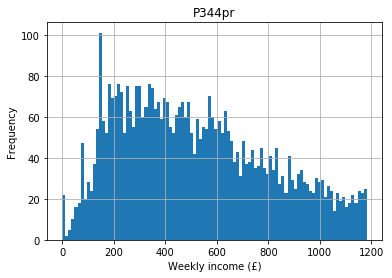

In [8]:
food_trimmed.hist("P344pr", bins = 100)
plt.xlabel("Weekly income (£)")
plt.ylabel("Frequency")

If we arrange these in order and take the middle point we obtain the median income:

In [9]:
food_trimmed["P344pr"].median()

476.799

If your data have an even number of items, the median is the mean (average) of the two middle points.
For example, using the following example data with four data points - 2, 4, 6, 8 - there is no one middle point.
Instead 4 and 6 are the middle points.
The median is the mean of these, which is $\frac{(4 + 6)}{2} = 5$.

The median is often considered more *robust* than the mean, which means it is less susceptible to outliers, for reasons we'll get to in a moment.


In [10]:
food_trimmed.P344pr.mean()

518.3056177244473

If the incomes were an ideal normal distribution, the mean and the median would be identical.
In the wild, most distributions are not exactly normal (or ideal) so the mean and the median differ, as we have seen with our example data.

If there are outliers in our data set these can affect the mean up or down.
For example, if there are a few individuals in our data that are substantially wealthier than most this can affect the mean.
The mean of the untrimmed data (i.e. with the top--coded individuals still included) is:

In [11]:
food.P344pr.mean()

620.4335721826773

These individuals have increased the mean, but do not affect the median as substantially:

In [12]:
food.P344pr.median()

563.1500000000001

For this reason we often consider the median a more *robust* measure of central tendency than the mean, and why you should be careful when someone presents a mean value without any additional information.
For comparison, a distribution of the untrimmed data looks like this:

Text(0, 0.5, 'Frequency')

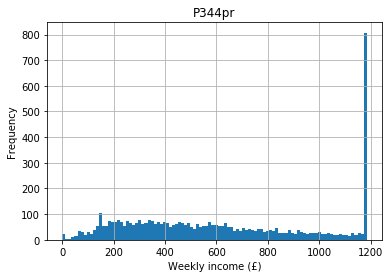

In [13]:
food.hist("P344pr", bins = 100)
plt.xlabel("Weekly income (£)")
plt.ylabel("Frequency")

# Measures of spread

We saw in the measures of central tendency chapter that the mean can be a poor representation of data if the data is skewed, and that we should therefore be careful when someone presents us with a mean (or average) without any further information.

One of the types of 'further information' that can help us is a measure of spread of the data around the mean value.
We usually use the *variance* and the *standard deviation* to quantify measure of spread.
Both are easy to calculate, and even easier to convert between each other.


## Variance

To calculate the variance:

1. subtract the mean from each score
1. square the result
1. sum the results to produce one value
1. divide by $n - 1$ (number of observations minus one)

$$
(\#eq:variance)
\frac{\Sigma (x - \bar{x}) ^ 2}{N-1}
$$

Using $n - 1$ rather than simply the number of observations is known as [Bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction).
To calculate the variance of the population we must assume that the population mean is the same as the sample mean that we have observed.
In fixing the population mean we reduce the degrees of freedom of our observations, because if we change these the final observation is determined in order for the mean to remain constant.

For example if our sample mean is 100 we assume our population mean is 100.
If we have two observations these might be 110 and 90 (mean 100).
If we change the 110 value to 120, the 90 value *must* change to 80 to ensure the sample mean (and therefore the population mean) remains 100, so there is only one degree of freedom.
We would therefore use $2 - 1$ as the denominator in our variance calculation.

```{r income-variance, eval=FALSE}
var(dat$income)
```


## Standard deviation

As you've probably noticed the variance is not in the units of the original data (otherwise the variance would be £` var(dat$income)`).
This is where the standard deviation comes in.
In fact the unit of the variance is the *square* of the unit of the original data.
The standard deviation is therefore a measure of spread in the unit of the original data, and is calculated simply by square rooting the variance.

$$
(\#eq:standard-deviation)
\sqrt{\frac{\Sigma (x - \bar{x}) ^ 2}{N-1}}
$$

The standard deviation of the income is therefore:

```{r income-sd, eval=FALSE}
sd(dat$income)
```

The standard deviation is a measure of how far the data points are on average from the mean.
A small standard deviation means the mean fairly accurately represents the data; a large standard deviation means the mean does not represent the data well.


## Standard error and confidence intervals

Standard error is effectively the standard deviation of the population mean.
The standard deviation quantifies how well the sample mean fits the observed (i.e. sample) data, not the population, but we're really interested in how well our sample mean represents the population.

Because any sample we take from the population is going to be slightly different from all other samples (because everything varies) each sample mean is going to be slightly different from every other.
The standard error of the mean is a measure of how confident our sample mean matches the population mean.

One approach to calculate the standard error of the mean would be to take multiple samples.
The mean of each of these samples would form a sampling distribution due to variation: some sample means would be lower than the population mean; some sample means would be higher than the population mean; and many would be the same.
These sample mean values would form a normal distribution around the population mean.

The standard deviation of these sample means would tell us how well our sample means fit the population mean.
This is known as the standard error of the mean ($SE_{\bar{x}}$).

In practice we can usually only take one sample so we can estimate it with:

$$
(\#eq:standard-error)
\sigma_{\bar{x}} = \frac{s}{\sqrt{n}}
$$

where $\sigma_{\bar{x}}$ is the standard error of the population mean, $s$ is the sample standard deviation, and $n$ is the number of observations in the sample.

We can demonstrate this with the census (in fact, we could demonstrate this with any data set and pretend it's the population and take multiple samples from it, but why not just use an actual population?).
I'm using ages of all people in Sheffield in 2011 to illustrate this, which I download from Nomisweb:

```{r download-sheffield-age, cache=TRUE, message=FALSE, eval=FALSE}
tempdir = tempdir()
download.file(
  "https://www.nomisweb.co.uk/api/v01/dataset/NM_503_1.data.csv?date=latest&geography=1946157123&rural_urban=0&c_age=1...101&measures=20100&signature=NPK-0c73734c0f725c979cee3a:0xa9b892a105be9e9449cdb6c88bdac678e12b229e",
  destfile = paste0(tempdir, "census.csv")
)

age = readr::read_csv(paste0(tempdir, "census.csv"))

age =
  age %>% 
  select(C_AGE_NAME, OBS_VALUE) %>% 
  filter(C_AGE_NAME != "Age 100 and over") %>% 
  mutate(
    C_AGE_NAME = if_else(C_AGE_NAME == "Age under 1", "0", C_AGE_NAME)
  ) %>% 
  mutate(C_AGE_NAME = str_replace(C_AGE_NAME, "Age ", "")) %>% 
  mutate(C_AGE_NAME = as.integer(C_AGE_NAME)) %>% 
  uncount(OBS_VALUE)
```

Figure \@ref(fig:age-hist) is a histogram of ages in people in Sheffield from the 2011 Census.

```{r age-hist, fig.height=3.5, fig.cap="Histogram of ages in Sheffield", cache=TRUE, eval=FALSE}
ggplot(age) + geom_histogram(aes(C_AGE_NAME), binwidth = 1) +
  xlab("Age") + ylab("Frequency")
```

```{r mode-age, eval=FALSE}
mode_age =
  age %>% 
  count(C_AGE_NAME) %>% 
  arrange(desc(n)) %>% 
  filter(row_number() == 1) %>% 
  select(C_AGE_NAME) %>% 
  unlist()
```

The modal age is ` mode_age`; the median age is ` median(age$C_AGE_NAME)`; and crucially the mean age is ` mean(age$C_AGE_NAME)`.

Let's take 1,000 samples from the population, and make a sampling distribution of these means:

```{r sample-age-1000, eval=FALSE}
set.seed(42)
samples = replicate(1000, sample_n(age, 1000))
samples = map(samples, mean)
samples = do.call(rbind, samples)
colnames(samples) = "mean_age"
samples = as.data.frame(samples)
```

```{r samples-age-hist, cache=TRUE, fig.cap="Histogram of samples from age data set", fig.height=3.5, eval=FALSE}
ggplot(samples) + geom_histogram(aes(mean_age), bins = 50) +
  xlab("Sample mean age") + ylab("Frequency")
```

From Figure \@ref(fig:samples-age-hist) most sample means are around 38, although a few are as low as 36 and as high as 40.
Remember we know are population mean is ` mean(age$C_AGE_NAME)` but we wouldn't normally know this.
If we just had access to one sample, how would we know if the resultant sample mean was close to the population mean?
From the histogram of sample means we can see that it's more likely to end up with a sample mean that's close to the population mean than one that's incorrect, and we can quantify this with a confidence interval.

Let's take a sample of 1000 random cases from this data set and pretend it's all we have access to:

```{r age-sample, eval=FALSE}
age_sample =
  age %>% 
  sample_n(1000)
```

The mean of this sample is ` mean(age_sample$C_AGE_NAME)`, very close to the population mean but not quite the same.
The standard error of this sample is:

```{r standard-error-sample-age, eval=FALSE}
se_age = sd(age_sample$C_AGE_NAME) / sqrt(nrow(age_sample))
se_age
```

We know that an ideal normal distribution will have [95\% of cases within 1.96 standard deviations of the mean](https://en.wikipedia.org/wiki/Normal_distribution#Standard_deviation_and_coverage).
If we multiply our standard error by $\pm$ 1.96 that therefore defines a 95\% confidence interval.
In this case ` mean(age_sample$C_AGE_NAME) - (1.96 * se_age)` to ` mean(age_sample$C_AGE_NAME) + (1.96 * se_age)`.
This effectively estimates that if we were to take 100 samples the population mean would fall within these bounds 95 times.
In our example the population mean is indeed within the 95\% confidence interval of the sample mean.

To calculate 99\% confidence intervals use 2.58 standard deviations rather than 1.96, in this example resulting in a confidence interval between ` mean(age_sample$C_AGE_NAME) - (2.58 * se_age)` and ` mean(age_sample$C_AGE_NAME) + (2.58 * se_age)`
Perhaps counterintuitively this results in a wider interval (because the interval ensures the population mean falls within these bounds 99 times instead of 95); it is not more precise.

From the standard error of the mean and confidence interval we can therefore quantify how confident we are that the sample mean is close to the true population mean.
